## SVM Checker

In [12]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=10, num_features=2, grid_size=200):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[-0.55164318  0.30589962]
 [-0.48627826 -0.30825067]
 [-0.12997623  1.49434191]
 [ 1.16088115 -1.1814506 ]
 [-0.29954047 -0.15445835]
 [ 0.73290047  0.47576777]
 [-0.16672172  1.64133785]
 [ 0.07563044  1.55038913]
 [ 0.84039198 -0.59660648]
 [-0.14309578  1.15046839]]
     pcost       dcost       gap    pres   dres
 0: -3.0802e+00 -8.3022e+00  2e+01  3e+00  2e+00
 1: -7.9419e+00 -1.2125e+01  1e+01  2e+00  9e-01
 2: -3.2899e+01 -3.5985e+01  1e+01  1e+00  8e-01
 3: -3.9106e+01 -4.4852e+01  1e+01  6e-01  4e-01
 4: -3.7452e+01 -3.8178e+01  1e+00  4e-02  2e-02
 5: -3.7351e+01 -3.7359e+01  1e-02  4e-04  2e-04
 6: -3.7350e+01 -3.7350e+01  1e-04  4e-06  2e-06
 7: -3.7350e+01 -3.7350e+01  1e-06  4e-08  2e-08
Optimal solution found.


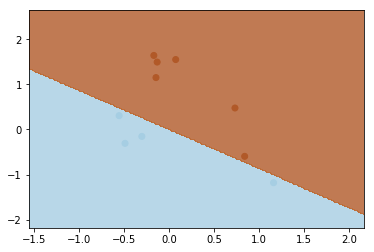

In [15]:
example()